<a href="https://colab.research.google.com/github/dewikinasih/Disney-Movies-and-TV-Shows/blob/main/disneyplus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import beberapa package yang dibutuhkan
import pandas as pd
import numpy as np

In [ ]:
# untuk mengambil data dari google drive
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/titles.csv')
df.head()

Mounted at /content/gdrive


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,135045.0,54.265,6.999
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,tt0032455,7.7,98764.0,43.609,7.382


In [ ]:
df.shape

(1854, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1854 non-null   object 
 1   title                 1854 non-null   object 
 2   type                  1854 non-null   object 
 3   description           1845 non-null   object 
 4   release_year          1854 non-null   int64  
 5   age_certification     1403 non-null   object 
 6   runtime               1854 non-null   int64  
 7   genres                1854 non-null   object 
 8   production_countries  1854 non-null   object 
 9   seasons               540 non-null    float64
 10  imdb_id               1376 non-null   object 
 11  imdb_score            1339 non-null   float64
 12  imdb_votes            1328 non-null   float64
 13  tmdb_popularity       1839 non-null   float64
 14  tmdb_score            1708 non-null   float64
dtypes: float64(5), int64(

In [ ]:
# Hapus kolom tdk penting
df.drop(['id','description','age_certification','seasons','imdb_id'], axis=1,inplace=True)
df.head()

,title,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Miracle on 34th Street,MOVIE,1947,96,"['family', 'comedy', 'drama']",['US'],7.9,50969.0,23.515,7.388
1,The Adventures of Ichabod and Mr. Toad,MOVIE,1950,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],6.9,16502.0,16.194,6.500
2,Cinderella,MOVIE,1950,74,"['fantasy', 'animation', 'family', 'romance']",['US'],7.3,164292.0,93.547,7.035
3,Dumbo,MOVIE,1941,64,"['animation', 'drama', 'family', 'fantasy']",['US'],7.2,135045.0,54.265,6.999
4,Fantasia,MOVIE,1941,119,"['animation', 'family', 'fantasy', 'music']",['US'],7.7,98764.0,43.609,7.382


In [ ]:
# Melihat nilai minimum dan maksimum
print(df['release_year'].min())
print(df['release_year'].max())

1928
2023


In [ ]:
# hapus data film sblm 2013
df = df.loc[(df.release_year >= 2013) & (df.release_year < 2023) ]
df.head()

,title,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
845,Cosmos,SHOW,2014,43,['documentation'],['US'],NaN,NaN,33.018,8.443
846,Marvel's Agents of S.H.I.E.L.D.,SHOW,2013,43,"['drama', 'scifi', 'action', 'thriller']",['US'],7.5,219336.0,140.327,7.484
847,Guardians of the Galaxy,MOVIE,2014,122,"['action', 'scifi', 'comedy']",['US'],8.0,1125382.0,33.466,7.900
848,Star Wars Rebels,SHOW,2014,23,"['action', 'scifi', 'fantasy', 'drama', 'anima...",['US'],8.0,46309.0,74.495,7.655
849,The Great Christmas Light Fight,SHOW,2013,43,['reality'],['US'],6.6,289.0,8.521,9.700


In [ ]:
df.shape

(986, 10)

In [ ]:
# Handling Genre Column yg awalnya bntk list trs dipilih di list pertama aja
df['genres'] = df['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
df['genre'] = df['genres'].str.split(',').str[0]

# For countries
df['production_countries'] = df['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
df['production_country'] = df['production_countries'].str.split(',').str[0]

# Hapus kolom genres dan production_countries
df.drop(['genres','production_countries'], axis=1,inplace=True)

# lihat 5 data teratas
df.head()

<ipython-input-6-7052aa00742d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genres'] = df['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
<ipython-input-6-7052aa00742d>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['production_countries'] = df['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')


,title,type,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
845,Cosmos,SHOW,2014,43,NaN,NaN,33.018,8.443,documentation,US
846,Marvel's Agents of S.H.I.E.L.D.,SHOW,2013,43,7.5,219336.0,140.327,7.484,drama,US
847,Guardians of the Galaxy,MOVIE,2014,122,8.0,1125382.0,33.466,7.900,action,US
848,Star Wars Rebels,SHOW,2014,23,8.0,46309.0,74.495,7.655,action,US
849,The Great Christmas Light Fight,SHOW,2013,43,6.6,289.0,8.521,9.700,reality,US


<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 845 to 1830
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 986 non-null    object 
 1   type                  986 non-null    object 
 2   release_year          986 non-null    int64  
 3   runtime               986 non-null    int64  
 4   genres                986 non-null    object 
 5   production_countries  986 non-null    object 
 6   imdb_score            721 non-null    float64
 7   imdb_votes            710 non-null    float64
 8   tmdb_popularity       973 non-null    float64
 9   tmdb_score            856 non-null    float64
 10  genre                 986 non-null    object 
 11  production_country    986 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 100.1+ KB


In [ ]:
df.tail()

,title,type,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
1826,Dancing With The Stars: The Pros' Most Memorab...,MOVIE,2022,55,NaN,NaN,0.622,10.0,documentation,US
1827,"Extra Episode, or Not: Behind the Scenes of Al...",MOVIE,2022,29,NaN,NaN,0.600,NaN,documentation,BR
1828,Disney Gallery: Star Wars: The Book of Boba Fett,SHOW,2022,60,7.5,484.0,NaN,NaN,documentation,US
1829,Meet Spidey and His Amazing Friends - shorts,SHOW,2021,5,NaN,NaN,NaN,NaN,,US
1830,Tangled Sing-Along,MOVIE,2022,100,NaN,NaN,NaN,NaN,,


In [ ]:
df['genre'].unique()

array(['documentation', 'drama', 'action', 'reality', 'comedy', 'scifi',
       'fantasy', 'animation', 'family', 'thriller', 'western', 'romance',
       'crime', 'music', 'history', 'horror', '', 'sport', 'war'],
      dtype=object)

In [ ]:
# Melihat nilai unik dari kedua kolom
print(df['genre'].unique())
print(df['production_country'].unique())

['documentation' 'drama' 'action' 'reality' 'comedy' 'scifi' 'fantasy'
 'animation' 'family' 'thriller' 'western' 'romance' 'crime' 'music'
 'history' 'horror' '' 'sport' 'war']
['US' 'GB' 'AE' 'AU' 'KR' 'CA' '' 'DE' 'FR' 'IN' 'ES' 'CN' 'AR' 'IT' 'CO'
 'JP' 'ZA' 'NZ' 'CL' 'AT' 'PH' 'BW' 'GR' 'BR' 'TW' 'MX' 'DK' 'TR']


In [ ]:
# Ganti '' menjadi NaN
df['genre'] = df['genre'].replace('', np.nan)
df['production_country'] = df['production_country'].replace('',np.nan)
df.tail()

,title,type,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
1826,Dancing With The Stars: The Pros' Most Memorab...,MOVIE,2022,55,NaN,NaN,0.622,10.0,documentation,US
1827,"Extra Episode, or Not: Behind the Scenes of Al...",MOVIE,2022,29,NaN,NaN,0.600,NaN,documentation,BR
1828,Disney Gallery: Star Wars: The Book of Boba Fett,SHOW,2022,60,7.5,484.0,NaN,NaN,documentation,US
1829,Meet Spidey and His Amazing Friends - shorts,SHOW,2021,5,NaN,NaN,NaN,NaN,NaN,US
1830,Tangled Sing-Along,MOVIE,2022,100,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Replace NAN with unknown
df[['genre','production_country']] = df[['genre','production_country']].fillna('unknown')
df.tail()

,title,type,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
1826,Dancing With The Stars: The Pros' Most Memorab...,MOVIE,2022,55,NaN,NaN,0.622,10.0,documentation,US
1827,"Extra Episode, or Not: Behind the Scenes of Al...",MOVIE,2022,29,NaN,NaN,0.600,NaN,documentation,BR
1828,Disney Gallery: Star Wars: The Book of Boba Fett,SHOW,2022,60,7.5,484.0,NaN,NaN,documentation,US
1829,Meet Spidey and His Amazing Friends - shorts,SHOW,2021,5,NaN,NaN,NaN,NaN,unknown,US
1830,Tangled Sing-Along,MOVIE,2022,100,NaN,NaN,NaN,NaN,unknown,unknown


# Handling the 'seasons' column

Now let's deal with the 'seasons' column. At first glance, we can say that all the null values are of type 'MOVIE'. Let's see if this is true by comparing the number of null values with the number of movie titles that do not have a value in 'seasons'

In [ ]:
len(df.loc[(df['seasons'].isna()) & (df['type'] == 'MOVIE')]) == df.seasons.isna().sum()

True

So, all the null values from 'season' is from movies. Let's change the null values to 0.

In [ ]:
df['seasons'].fillna(0, inplace=True)

In [ ]:
df.head()

,title,type,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
845,Cosmos,SHOW,2014,43,3.0,6.772678,5.381622e+04,33.018,8.443,documentation,US
846,Marvel's Agents of S.H.I.E.L.D.,SHOW,2013,43,7.0,7.500000,2.193360e+05,140.327,7.484,drama,US
847,Guardians of the Galaxy,MOVIE,2014,122,0.0,8.000000,1.125382e+06,33.466,7.900,action,US
848,Star Wars Rebels,SHOW,2014,23,4.0,8.000000,4.630900e+04,74.495,7.655,action,US
849,The Great Christmas Light Fight,SHOW,2013,43,10.0,6.600000,2.890000e+02,8.521,9.700,reality,US


In [ ]:
# Periksa missing data
df.isna().sum()

title                   0
type                    0
release_year            0
runtime                 0
imdb_score            265
imdb_votes            276
tmdb_popularity        13
tmdb_score            130
genre                   0
production_country      0
dtype: int64

In [ ]:
df['release_year'].mean().round()

2019.0

In [ ]:
# Mengganti missing data dengan nilai mean
df[['imdb_score','imdb_votes','tmdb_popularity',
    'tmdb_score']] = df[['imdb_score','imdb_votes',
    'tmdb_popularity','tmdb_score']].fillna(df[['imdb_score','imdb_votes','tmdb_popularity','tmdb_score']].mean().round())

In [ ]:
df.isna().sum()

title                 0
type                  0
release_year          0
runtime               0
imdb_score            0
imdb_votes            0
tmdb_popularity       0
tmdb_score            0
genre                 0
production_country    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1854 non-null   object 
 1   type                1854 non-null   object 
 2   release_year        1854 non-null   int64  
 3   runtime             1854 non-null   int64  
 4   seasons             1854 non-null   float64
 5   imdb_score          1854 non-null   float64
 6   imdb_votes          1854 non-null   float64
 7   tmdb_popularity     1854 non-null   float64
 8   tmdb_score          1854 non-null   float64
 9   genre               1854 non-null   object 
 10  production_country  1854 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 159.5+ KB


In [ ]:
df.shape

(986, 10)

In [ ]:
df.head()

,title,type,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
845,Cosmos,SHOW,2014,43,3.0,6.772678,5.381622e+04,33.018,8.443,documentation,US
846,Marvel's Agents of S.H.I.E.L.D.,SHOW,2013,43,7.0,7.500000,2.193360e+05,140.327,7.484,drama,US
847,Guardians of the Galaxy,MOVIE,2014,122,0.0,8.000000,1.125382e+06,33.466,7.900,action,US
848,Star Wars Rebels,SHOW,2014,23,4.0,8.000000,4.630900e+04,74.495,7.655,action,US
849,The Great Christmas Light Fight,SHOW,2013,43,10.0,6.600000,2.890000e+02,8.521,9.700,reality,US


In [ ]:
# save to excel di drive
# df.to_excel(excel_writer=r'/content/gdrive/MyDrive/buatmedium7.xlsx')

#Visualisasi
Melihat berbagau aspek dengan grafik

In [ ]:
# import package
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,6))


<Axes: title={'center': 'Content Type'}, ylabel='type'>

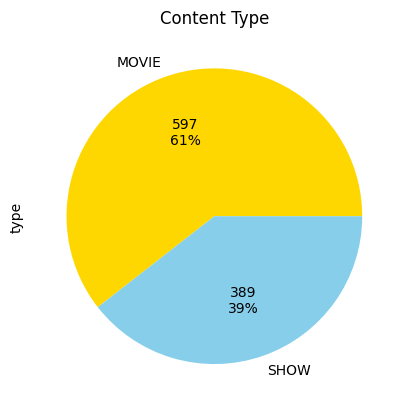

In [ ]:
#Tipe konten
def label(val):
  return f'{val/100*len(df):.0f}\n{val:.0f}%'

plt.title('Content Type')
df['type'].value_counts().plot(kind='pie', autopct=label,colors=['gold','skyblue'])

In [ ]:
# Mengklasifikasi jumlah judul tiap tahun
total_year = df.groupby('release_year')['title'].count()
total_year

release_year
2013     55
2014     56
2015     67
2016     80
2017     79
2018     71
2019    114
2020    145
2021    144
2022    175
Name: title, dtype: int64

In [ ]:
grup = df.groupby(['type','release_year'])['title'].count()
movie = grup['MOVIE']
show = grup['SHOW']

In [ ]:
movie

release_year
2013     33
2014     40
2015     35
2016     51
2017     42
2018     41
2019     65
2020     92
2021     85
2022    113
Name: title, dtype: int64

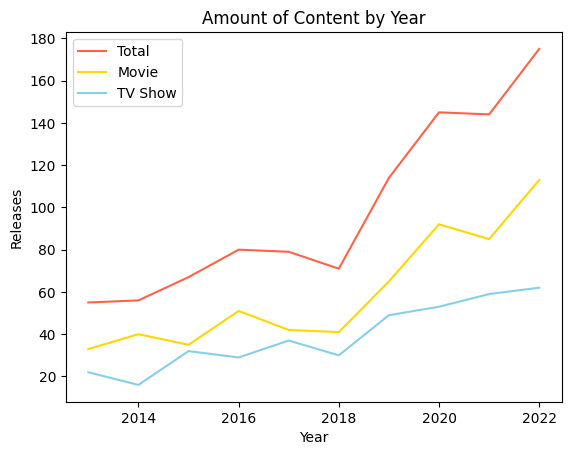

In [ ]:
total_year.plot(x='release_year', y='Num_of_title', kind='line',color='tomato')
movie.plot(x='release_year', y='Num_of_title', kind='line',color='gold')
show.plot(x='release_year', y='Num_of_title', kind='line',color='skyblue')

plt.title('Amount of Content by Year')
plt.legend(['Total','Movie','TV Show'])
plt.ylabel('Releases')
plt.xlabel('Year')
plt.show()

In [ ]:
df.genre.unique()

array(['documentation', 'drama', 'action', 'reality', 'comedy', 'scifi',
       'fantasy', 'animation', 'family', 'thriller', 'western', 'romance',
       'crime', 'music', 'history', 'horror', 'unknown', 'sport', 'war'],
      dtype=object)

In [ ]:
genre = df.groupby('genre')['title'].count().sort_values(ascending=False).head(10)
genre

genre
documentation    374
animation        110
comedy           105
action            67
scifi             61
drama             60
reality           52
family            39
unknown           34
fantasy           34
Name: title, dtype: int64

<Axes: title={'center': 'Top 10 Genres On Disney+'}, xlabel='genre'>

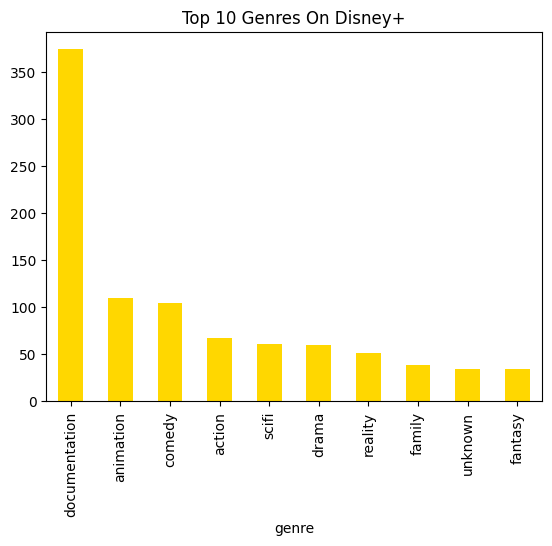

In [ ]:
plt.title('Top 10 Genres On Disney+')
genre.plot(y='Num_of_title',x='genre',kind='bar',color='gold')

<Axes: xlabel='genre', ylabel='tmdb_score'>

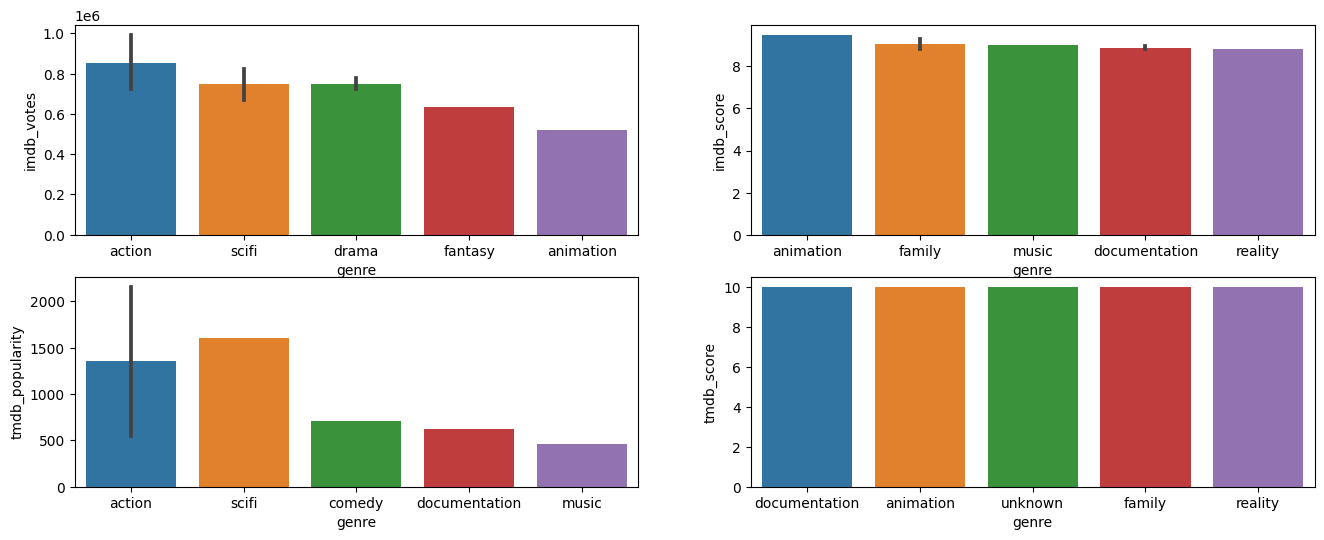

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(221)
sns.barplot(x='genre',y='imdb_votes',data=df.nlargest(25,'imdb_votes'))
plt.subplot(222)
sns.barplot(x='genre',y='imdb_score',data=df.nlargest(10,'imdb_score'))
plt.subplot(223)
sns.barplot(x='genre',y='tmdb_popularity',data=df.nlargest(6,'tmdb_popularity'))
plt.subplot(224)
sns.barplot(x='genre',y='tmdb_score',data=df.nlargest(10,'tmdb_score'))

In [ ]:
mov = df.loc[df.type=='MOVIE']
tv = df.loc[df.type=='SHOW']

<Axes: title={'center': 'Distribution of Runtime TV Show'}, xlabel='runtime', ylabel='Count'>

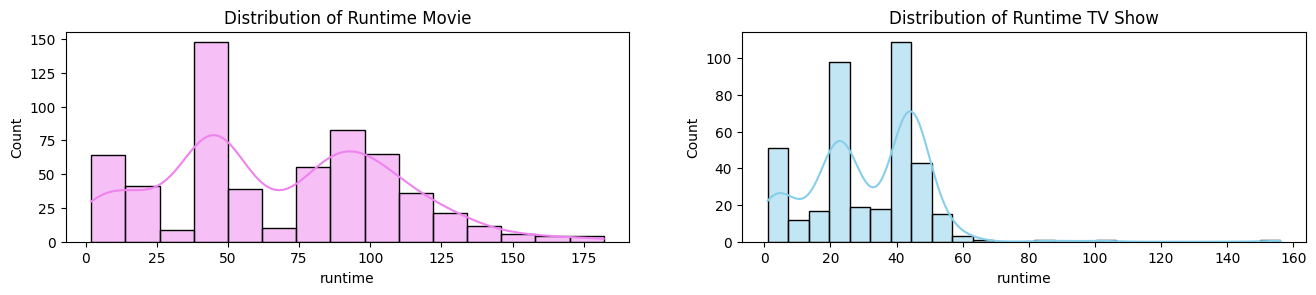

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(221)
plt.title('Distribution of Runtime Movie')
sns.histplot(mov['runtime'],kde=True,color='violet')
plt.subplot(222)
plt.title('Distribution of Runtime TV Show')
sns.histplot(tv['runtime'],kde=True,color='skyblue')

In [ ]:
df['production_country'].unique()

array(['US', 'GB', 'AE', 'AU', 'KR', 'CA', 'unknown', 'DE', 'FR', 'IN',
       'ES', 'CN', 'AR', 'IT', 'CO', 'JP', 'ZA', 'NZ', 'CL', 'AT', 'PH',
       'BW', 'GR', 'BR', 'TW', 'MX', 'DK', 'TR'], dtype=object)

In [ ]:
country = df.groupby('production_country')['title'].count().sort_values(ascending=False)

<Axes: xlabel='production_country'>

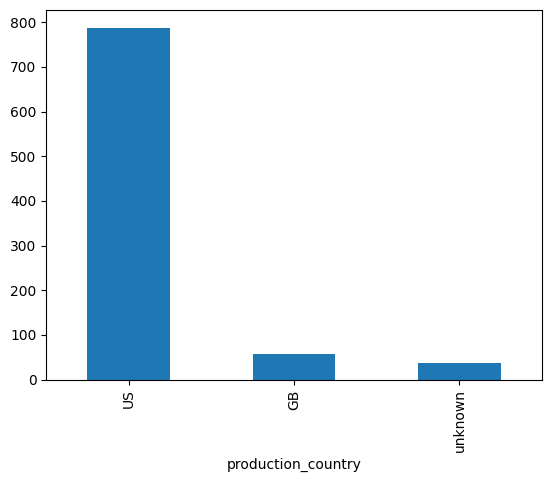

In [ ]:
country.plot(y='num_of_titles',x='country',kind='bar')

<Axes: ylabel='title'>

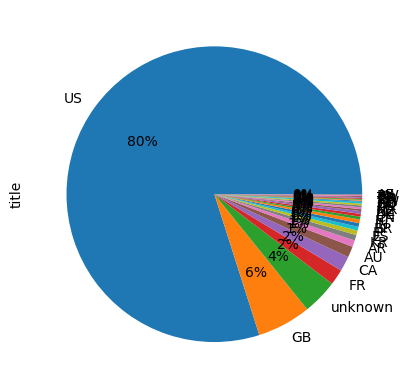

In [ ]:
country.plot(kind='pie', autopct='%1.0f%%')

# Lihat poin movie

mana film yg votenya paling tinggi, mana film yang scorenya paling tinggi

In [ ]:
# paling kecil
mov.sort_values(by='tmdb_popularity',ascending=False).tail()

,title,type,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
1246,Jaguar Beach Battle,MOVIE,2018,44,7.0,54648.0,0.6,7.0,documentation,US
1095,The Incredible Dr. Pol Blue Ribbon Kids,MOVIE,2016,44,7.0,54648.0,0.6,7.0,documentation,US
864,Blow Your Mind,MOVIE,2013,45,7.0,54648.0,0.6,7.0,documentation,AU
1501,World's Biggest Great White Shark,MOVIE,2019,44,6.3,73.0,0.6,7.0,reality,US
1240,Disney’s Fairy Tale Weddings: Holiday Magic,MOVIE,2017,58,7.0,54648.0,0.6,7.0,drama,US


In [ ]:
# skor imdb paling tinggi
mov.sort_values(by='imdb_score',ascending=False).head()

,title,type,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
1820,Dickie V,MOVIE,2022,80,8.9,49.0,0.895,7.0,documentation,US
1716,Marvel Studios Assembled: The Making of Hawkeye,MOVIE,2022,60,8.8,54648.0,10.258,7.2,documentation,US
1735,BTS: Permission to Dance on Stage - LA,MOVIE,2022,130,8.6,5672.0,31.007,9.2,documentation,KR
1704,Marvel Studios ASSEMBLED: The Making of WandaV...,MOVIE,2021,57,8.5,54648.0,2.744,9.5,documentation,US
1774,The Making of Loki,MOVIE,2021,64,8.5,54648.0,2.539,5.0,documentation,US


In [ ]:
# popularitas tmdb paling tinggi
mov.sort_values(by='tmdb_popularity',ascending=False).head()

,title,type,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
1513,Black Panther: Wakanda Forever,MOVIE,2022,162,6.8,235189.0,2159.377,7.337,action,US
1622,The Simpsons Meet the Bocellis in Feliz Navidad,MOVIE,2022,4,5.6,54648.0,709.970,5.167,comedy,US
1531,Avatar: The Deep Dive - A Special Edition of 2...,MOVIE,2022,41,6.4,147.0,620.722,6.875,documentation,US
1610,Encanto at the Hollywood Bowl,MOVIE,2022,45,7.5,914.0,460.632,7.400,music,US
1527,Thor: Love and Thunder,MOVIE,2022,119,6.3,349821.0,449.249,6.625,comedy,US


In [ ]:
# paling tinggi
tv.sort_values(by='imdb_score',ascending=False).head()

,title,type,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
1104,Bluey,SHOW,2018,8,9.5,13596.0,114.829,8.167,animation,AU
1455,The Wizard of Paws,SHOW,2020,23,9.3,59.0,1.858,7.000,family,US
1524,The Beatles: Get Back,SHOW,2021,156,9.0,24054.0,11.192,8.397,music,NZ
1816,The Hatcher Family Dairy,SHOW,2021,44,9.0,76.0,1.065,7.000,documentation,US
1545,Light & Magic,SHOW,2022,60,8.8,2510.0,6.444,7.139,documentation,US


In [ ]:
# paling kecil
tv.sort_values(by='tmdb_popularity',ascending=False).head()

,title,type,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
1253,The Mandalorian,SHOW,2019,40,8.7,506303.0,1607.738,8.478,scifi,US
960,Miraculous: Tales of Ladybug & Cat Noir,SHOW,2015,21,7.7,10102.0,546.308,8.019,action,FR
1517,Willow,SHOW,2022,50,5.6,29332.0,234.838,7.078,action,US
1254,The Owl House,SHOW,2020,24,8.4,13721.0,228.944,8.700,action,US
1522,She-Hulk: Attorney at Law,SHOW,2022,32,5.2,172814.0,171.379,6.519,scifi,US


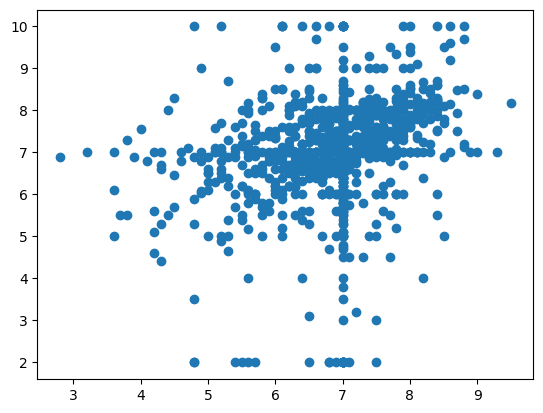

In [ ]:
# scatter plot skor
plt.scatter(x= df['imdb_score'],y = df['tmdb_score'])
plt.show()